## To detect Pneumonia patients from the trained Convoluted Neural Network using Keras.

Author: Rohith Kumar Sajja



#### Dataset

Acknowledgements
Data: https://data.mendeley.com/datasets/rscbjbr9sj/2

License: CC BY 4.0

Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

Import the required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
print(os.listdir("./input"))

import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

['.DS_Store', 'test', 'chest_xray', '__MACOSX', 'train', 'val']
Using TensorFlow backend.


 ## Data files
   
1. train: contains the training data/images for teaching our model.

2. val: contains images which we will use to validate our model. The purpose of this data set is to prevent our model from Overfitting.

3. test: this contains the data that we use to test the model once it has learned the relationships between the images and their label (Pneumonia/Not-Pneumonia)

       
    
    

In [3]:
mainDIR = os.listdir('./input/chest_xray')
print(mainDIR)

['.DS_Store', 'test', 'train', 'val']


In [4]:
train_folder= './input/chest_xray/train/'
val_folder = './input/chest_xray/val/'
test_folder = './input/chest_xray/test/'

## Set training and testing folders


In [5]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'
val_n = val_folder+'NORMAL/'
val_p = val_folder+'PNEUMONIA/'

print(train_n)
print(train_p)
print(val_n)
print(val_p)


./input/chest_xray/train/NORMAL/
./input/chest_xray/train/PNEUMONIA/
./input/chest_xray/val/NORMAL/
./input/chest_xray/val/PNEUMONIA/


## Sample of pictures



Number of NORMAL training X-ray images: 1342
Number of PNEUMONIA training X-ray images: 3876
Number of total training X-ray images: 5218
Number of NORMAL validation X-ray images: 9
Number of PNEUMONIA validation X-ray images: 9
Number of total validation X-ray images: 18
NORMAL X-ray:  NORMAL2-IM-1161-0001.jpeg
PNEUMONIA X-ray: person509_bacteria_2146.jpeg


Text(0.5, 1.0, 'Pneumonia')

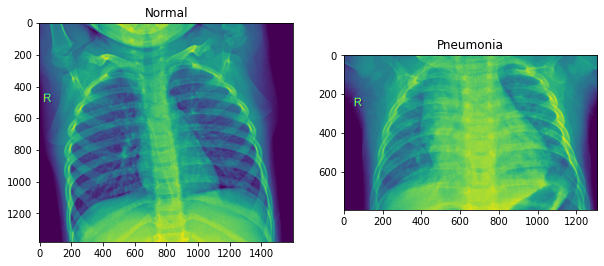

In [6]:
print("Number of NORMAL training X-ray images: " + str(len(os.listdir(train_n))))
print("Number of PNEUMONIA training X-ray images: " + str(len(os.listdir(train_p))))
total_training = len(os.listdir(train_p)) + len(os.listdir(train_n))
print("Number of total training X-ray images: " + str(total_training))

print("Number of NORMAL validation X-ray images: " + str(len(os.listdir(val_n))))
print("Number of PNEUMONIA validation X-ray images: " + str(len(os.listdir(val_p))))
total_val = len(os.listdir(val_p)) + len(os.listdir(val_n))
print("Number of total validation X-ray images: " + str(total_val))

#Normal X-ray
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('NORMAL X-ray: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia X-ray
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('PNEUMONIA X-ray:', sic_pic)

#Load images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Plot images using pyplot
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

These pictures are being generated randomly from the dataset. There are slight differences in the pictures, but  let's see if we can't create a Convolutional Neural Network which can create a more objective measure of quantifying and classifying these differences. **

## Convolutional Neural Networks built using deep learning library Keras</font>

* In this notebook, a CNN has been built with 2 Convolution layers. After each convolution, add a Pooling layer using max-pooling. 
* After the second convolutional layer, add 2 Fully Connected layers which will take out feature map of an image and make predictions about it. The second FC  
   has only 1 unit becuase it needs to predict if someone has pneumonia. 
 * After compiling the CNN, Adam optimization fuction is used which optimizes how fast our model learns the correct classification of the image.


In [7]:
#CNN model
cnn = Sequential()

#1st convolution layer
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling using max-pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

#2nd convolution layer
cnn.add(Conv2D(32, (3, 3), activation="relu"))

#2nd pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

#Flatten the layer
cnn.add(Flatten())

#Add fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

#Compile the CNN model
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])






## Fit the model to training dataset 
Testing data is segregated into a separate folder

In [8]:
num_of_test_samples = 600
batch_size = 32

In [9]:
#Fitting the CNN to the images
#The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('./input/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('./input/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('./input/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# CNN summary

In [10]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

# Training the CNN model
1 epoch

In [11]:
epoch_steps = total_training/batch_size

cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = epoch_steps*(0.2),
                         epochs = 1 ,
                         validation_data = validation_generator,
                         validation_steps = 1000)

Epoch 1/1
33/32 [==============================] - 219s 7s/step - loss: 0.5195 - accuracy: 0.7623 - val_loss: 0.5469 - val_accuracy: 0.6875


## Testing Accuracy

In [12]:
test_accu = cnn.evaluate_generator(test_set,steps=624)

print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 84.31594371795654 %


## Confusion matrix and the Classification Report

Using metrics from scikit-learn

In [17]:
Y_pred = cnn.predict_generator(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)

y_true = validation_generator.classes

# confusion_matrix(validation_generator.classes, y_pred)
confusion_matrix(y_true=y_true, y_pred=y_pred)


ValueError: Found input variables with inconsistent numbers of samples: [16, 3120]

In [14]:
max(y_pred)

0

## History of accuracy changes over training and validation datasets

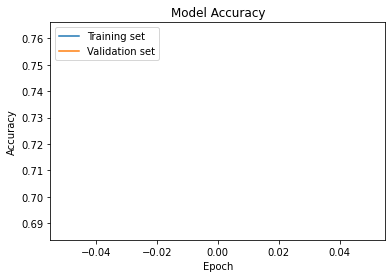

In [15]:
# Accuracy 

plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


## History of loss function changes

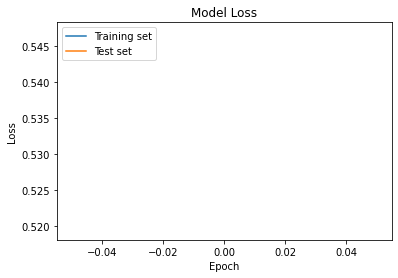

In [16]:
# Loss 

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

# <font color='red'> What this means? </font>
The world of medical imaging is ripe for a revolution in terms of deploying CNN based technologies. There is no need for a doctor or a health care provider to ponder these images to gauge things. This is not a shot at doctors or their jobs! The task of reading these is incredibly menial and repititive. Those are two things that AI technologies are great at. I will be working with some more bio-medical imaging dataset just to get more practice and probably create some web applications online for atleast one of them!!